#### Probabilistic Models Final Project
#### Modeling and Inferring Airline Passenger Satisfaction

In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os
# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [56]:
#loading the data
data=pd.read_csv("train.csv").drop('Unnamed: 0', axis=1)
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [44]:
data['Gender']=data['Gender'].map(dict({'Male': 0, 'Female': 1}))
data['Customer Type']=data['Customer Type'].map(dict({'disloyal Customer': 0, 'Loyal Customer': 1}))
data['Type of Travel']=data['Type of Travel'].map(dict({'Personal Travel': 0, 'Business travel': 1}))
#data['Class']=data['Class'].map(dict({'Eco Plus': 0, 'Business': 1, 'Eco': 2}))
data['satisfaction']=data['satisfaction'].map(dict({'neutral or dissatisfied': 0, 'satisfied': 1}))

In [45]:
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,1,13,0,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,0,0,25,1,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,1,1,26,1,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,1,1,25,1,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,0,1,61,1,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,0,23,1,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,73097,0,1,49,1,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,68825,0,0,30,1,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,54173,1,0,22,1,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0


In [46]:
def oheColumn(oheData, columnName):
    oneHotEnc = OneHotEncoder(dtype=int, handle_unknown='ignore')

    oheDataColumn = oneHotEnc.fit_transform(oheData[[columnName]]).toarray()

    oheData[oneHotEnc.categories_[0]] = oheDataColumn

    for catCol in oneHotEnc.categories_[0]:
        oheData.rename(columns = {catCol:columnName+'_'+catCol}, inplace = True)
    
    return oheData

In [47]:
data = oheColumn(data, 'Class').drop('Class', axis=1)

In [48]:
data

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,70172,0,1,13,0,460,3,4,3,1,...,4,4,5,5,25,18.0,0,0,0,1
1,5047,0,0,25,1,235,3,2,3,3,...,3,1,4,1,1,6.0,0,1,0,0
2,110028,1,1,26,1,1142,2,2,2,2,...,4,4,4,5,0,0.0,1,1,0,0
3,24026,1,1,25,1,562,2,5,5,5,...,3,1,4,2,11,9.0,0,1,0,0
4,119299,0,1,61,1,214,3,3,3,3,...,4,3,3,3,0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,0,23,1,192,2,1,2,3,...,4,2,3,2,3,0.0,0,0,1,0
103900,73097,0,1,49,1,2347,4,4,4,4,...,5,5,5,4,0,0.0,1,1,0,0
103901,68825,0,0,30,1,1995,1,1,1,3,...,4,5,5,4,7,14.0,0,1,0,0
103902,54173,1,0,22,1,1000,1,1,1,5,...,1,5,4,1,0,0.0,0,0,1,0


In [49]:
print(data.iloc[:,0:27].isna().sum())

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
Class_Business                         0
Class_Eco       

In [50]:
#Filling in nan values
data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].fillna(0)

In [51]:
print(data.iloc[:,0:27].isna().sum())

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Class_Business                       0
Class_Eco                            0
Class_Eco Plus           

In [52]:
data=data.drop_duplicates()

In [55]:
data

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,70172,0,1,13,0,460,3,4,3,1,...,4,4,5,5,25,18.0,0,0,0,1
1,5047,0,0,25,1,235,3,2,3,3,...,3,1,4,1,1,6.0,0,1,0,0
2,110028,1,1,26,1,1142,2,2,2,2,...,4,4,4,5,0,0.0,1,1,0,0
3,24026,1,1,25,1,562,2,5,5,5,...,3,1,4,2,11,9.0,0,1,0,0
4,119299,0,1,61,1,214,3,3,3,3,...,4,3,3,3,0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,0,23,1,192,2,1,2,3,...,4,2,3,2,3,0.0,0,0,1,0
103900,73097,0,1,49,1,2347,4,4,4,4,...,5,5,5,4,0,0.0,1,1,0,0
103901,68825,0,0,30,1,1995,1,1,1,3,...,4,5,5,4,7,14.0,0,1,0,0
103902,54173,1,0,22,1,1000,1,1,1,5,...,1,5,4,1,0,0.0,0,0,1,0


<AxesSubplot:>

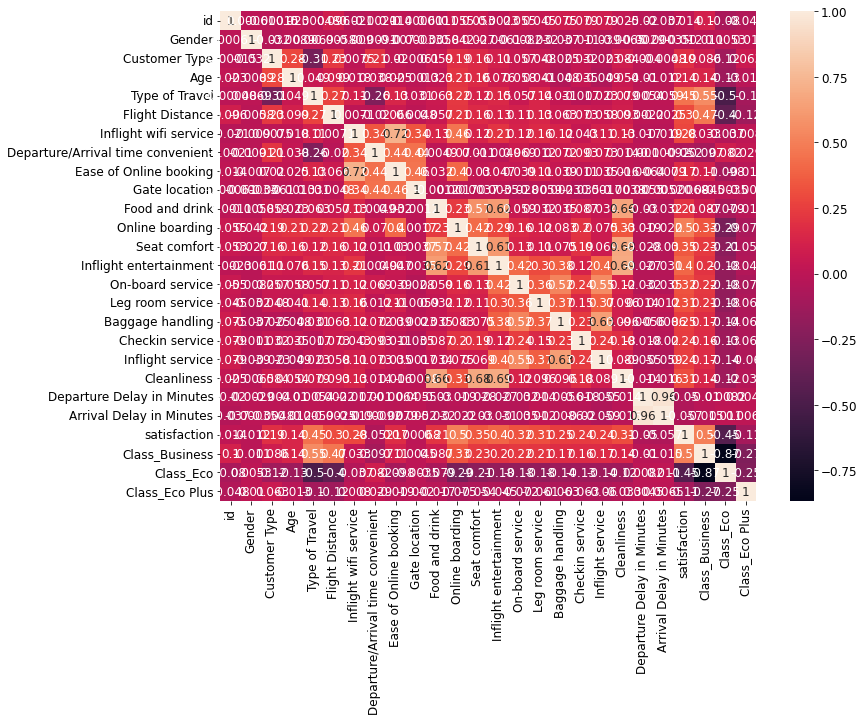

In [13]:
corrMatrix = data.corr()
#print(corrMatrix)
sns.heatmap(corrMatrix, annot=True,)

In [57]:
data1=data.loc[:, ['Type of Travel', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class','Inflight entertainment','Seat comfort']]#data.drop("id", axis=1) 'Inflight entertainment''Seat comfort'

In [58]:
data1

,Type of Travel,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,On-board service,Baggage handling,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class,Inflight entertainment,Seat comfort
0,Personal Travel,3,3,5,3,4,4,5,5,25,18.0,neutral or dissatisfied,Eco Plus,5,5
1,Business travel,3,3,1,3,1,3,4,1,1,6.0,neutral or dissatisfied,Business,1,1
2,Business travel,2,2,5,5,4,4,4,5,0,0.0,satisfied,Business,5,5
3,Business travel,2,5,2,2,2,3,4,2,11,9.0,neutral or dissatisfied,Business,2,2
4,Business travel,3,3,4,5,3,4,3,3,0,0.0,satisfied,Business,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Business travel,2,2,2,2,3,4,3,2,3,0.0,neutral or dissatisfied,Eco,2,2
103900,Business travel,4,4,2,4,5,5,5,4,0,0.0,satisfied,Business,5,5
103901,Business travel,1,1,4,1,3,4,5,4,7,14.0,neutral or dissatisfied,Business,4,5
103902,Business travel,1,1,1,1,4,1,4,1,0,0.0,neutral or dissatisfied,Eco,1,1


In [11]:
from pgmpy.estimators import PC
from pgmpy.estimators.CITests import chi_square
est = PC(data1)
print(est.estimate(significance_level=0.01).edges())

  0%|          | 0/5 [00:00<?, ?it/s]

TypeError: 'int' object is not iterable

In [59]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
hc = HillClimbSearch(data1)
best_model = hc.estimate(scoring_method=BicScore(data1))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('Type of Travel', 'Ease of Online booking'), ('Type of Travel', 'Online boarding'), ('Inflight wifi service', 'Ease of Online booking'), ('Ease of Online booking', 'Cleanliness'), ('Ease of Online booking', 'Food and drink'), ('Food and drink', 'Cleanliness'), ('Food and drink', 'Inflight entertainment'), ('Food and drink', 'Seat comfort'), ('Online boarding', 'Inflight wifi service'), ('Online boarding', 'Cleanliness'), ('Online boarding', 'Ease of Online booking'), ('Online boarding', 'Food and drink'), ('On-board service', 'Inflight service'), ('On-board service', 'Baggage handling'), ('Baggage handling', 'Inflight wifi service'), ('Baggage handling', 'Type of Travel'), ('Inflight service', 'Inflight entertainment'), ('Inflight service', 'Baggage handling'), ('Inflight service', 'Type of Travel'), ('Cleanliness', 'Inflight entertainment'), ('Cleanliness', 'Seat comfort'), ('satisfaction', 'Online boarding'), ('satisfaction', 'Inflight wifi service'), ('satisfaction', 'On-board ser

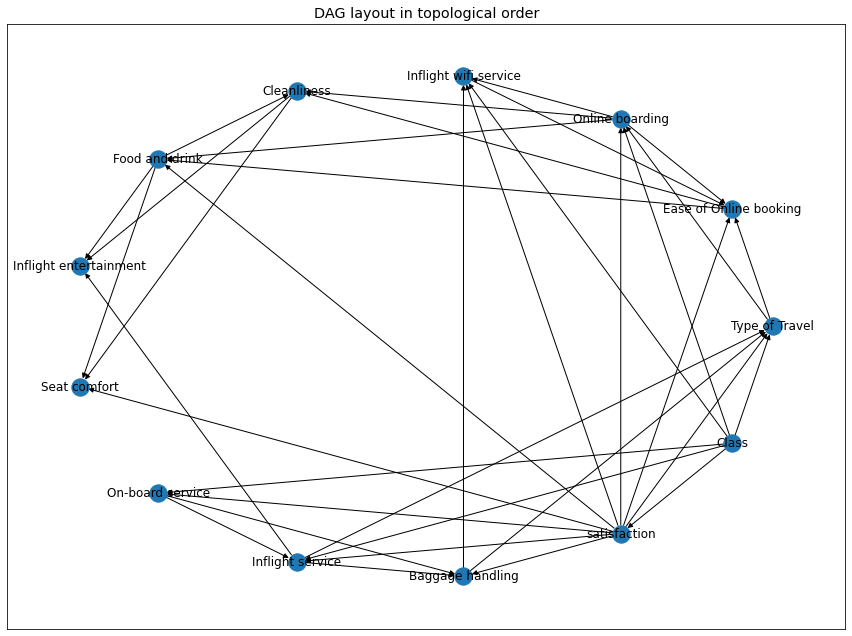

In [60]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph(best_model.edges())

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
# pos = nx.multipartite_layout(G, subset_key="layer")
pos=nx.circular_layout(G, scale=1, center=None, dim=2)
# nx.spring_layout(G)#nx.nx_pydot.graphviz_layout(G)
# 
fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, ax=ax)
ax.set_title("DAG layout in topological order")
fig.tight_layout()
plt.show()

the features which we are inferring are\

1)Satisfaction\
2)Type of Travel

In [ ]:
#Maximum likelihood estimator

In [61]:
from pgmpy.models import BayesianModel

model = BayesianModel(best_model.edges())

In [72]:
from pgmpy.estimators import MaximumLikelihoodEstimator
mle = MaximumLikelihoodEstimator(model, data1)
print(mle.estimate_cpd('satisfaction'))  # unconditional
mle.estimate_cpd('satisfaction')

+-----+--------------------+
| ... | Class(Eco Plus)    |
+-----+--------------------+
| ... | 0.7541510444563471 |
+-----+--------------------+
| ... | 0.2458489555436529 |
+-----+--------------------+


<TabularCPD representing P(satisfaction:2 | Class:3) at 0x198777fb070>

In [66]:
print(mle.estimate_cpd('Class'))

+-----------------+-----------+
| Class(Business) | 0.478145  |
+-----------------+-----------+
| Class(Eco)      | 0.449765  |
+-----------------+-----------+
| Class(Eco Plus) | 0.0720891 |
+-----------------+-----------+
